time: 0 passenger arrived
time: 0 passenger arrived
time: 1 passenger arrived
time: 1 passenger arrived
time: 2 passenger arrived
time: 2 passenger arrived
time: 2 checking in done
time: 3 passenger arrived
time: 3 checking in done
time: 4 passenger arrived
time: 4 passenger arrived
time: 4 passenger arrived
time: 4 checking in done
time: 5 passenger arrived
time: 5 passenger arrived
time: 5 checking in done
time: 5 checking in done
time: 5 checking in done
time: 6 checking in done
time: 6 security check done
time: 6 checking in done
time: 7 security check done
time: 7 checking in done
time: 7 security check done
time: 8 passenger arrived
time: 8 boarding done
time: 8 passenger arrived at 1 and done at 8
time: 9 security check done
time: 9 security check done
time: 9 checking in done
time: 9 boarding done
time: 9 passenger arrived at 0 and done at 9
time: 10 passenger arrived
time: 10 checking in done
time: 10 checking in done
time: 10 checking in done
time: 10 boarding done
time: 10 p

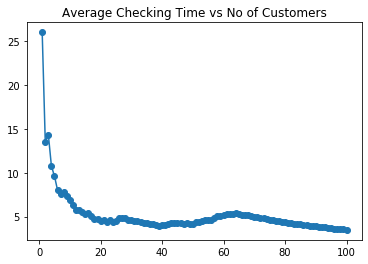

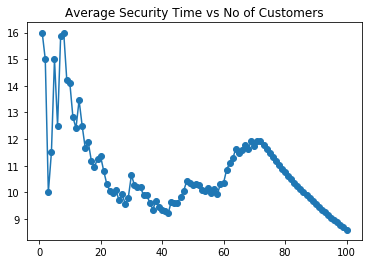

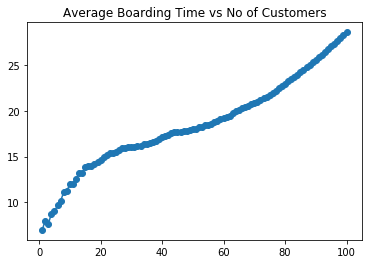

In [58]:
import simpy
import random
import matplotlib.pyplot as plt

class Airport(object):
    totalCheckin = 0
    totalSecurity = 0
    totalBoarding = 0
    cur_passenger = 0
    avgCheckin = []
    avgBoarding = []
    avgSecurity = []
    def __init__(self, num_checkin = 5, num_security = 5, num_boarding = 1, num_passengers = 100, arrival_limit = 100):
        self.env = simpy.Environment()
        self.checkin = simpy.Resource(self.env, num_checkin)
        self.security = simpy.Resource(self.env, num_security)
        self.boarding = simpy.Resource(self.env, num_boarding)
        self.num_passengers = num_passengers
        self.passengers = [
            Passenger(self, random.randint(0, arrival_limit)) for i in range(num_passengers)
        ]

class Passenger(object):
    def __init__(self, airport, arrival_time):
        self.arrival_t = arrival_time
        self.airport = airport
        self.action = self.airport.env.process(self.run())
    def run(self):

        #wait for arrival
        delta = self.arrival_t - self.airport.env.now
        yield self.airport.env.timeout(delta)
        print("time:", self.airport.env.now, "passenger arrived")

        #check in 
        with self.airport.checkin.request() as request:
            yield request
            #do the check in
            yield self.airport.env.timeout(random.randint(1,5)) # 1-5 minutes to check in
        print("time:", self.airport.env.now, "checking in done")
        self.airport.totalCheckin += self.airport.env.now - self.arrival_t


        #security
        with self.airport.security.request() as request:
            yield request
            #do the security
            yield self.airport.env.timeout(random.randint(2,6)) # 2-6 minutes
        print("time:", self.airport.env.now, "security check done")
        self.airport.totalSecurity += self.airport.env.now - self.arrival_t

        #boarding
        with self.airport.boarding.request() as request:
            yield request
            #do the boarding
            yield self.airport.env.timeout(random.randint(1,2)) #1-2 minutes to board
        print("time:", self.airport.env.now, "boarding done")
        
        print("time:", self.airport.env.now, f"passenger arrived at {self.arrival_t} and done at {self.airport.env.now}")
        self.airport.totalBoarding += self.airport.env.now - self.arrival_t
        self.airport.cur_passenger = self.airport.cur_passenger + 1
        
        # Statistics
        self.airport.avgCheckin.append(self.airport.totalCheckin/self.airport.cur_passenger)
        self.airport.avgSecurity.append(self.airport.totalSecurity/self.airport.cur_passenger)
        self.airport.avgBoarding.append(self.airport.totalBoarding/self.airport.cur_passenger)
        
        if self.airport.cur_passenger == self.airport.num_passengers:
            print("Average Checkin Time: ", self.airport.totalCheckin/self.airport.num_passengers)
            print("Average Security Time: ", self.airport.totalSecurity/self.airport.num_passengers)
            print("Average Boarding Time: ", self.airport.totalBoarding/self.airport.num_passengers)
            custList = list(range(1,101))
            
            # Plotting average Check-in
            plt.figure()
            plt.title("Average Checking Time vs No of Customers")
            plt.scatter(custList, self.airport.avgCheckin)
            plt.plot(custList, self.airport.avgCheckin)
            plt.savefig('Average_Checkin.jpg')
            
            #Average Security
            plt.figure()
            plt.title("Average Security Time vs No of Customers")
            plt.scatter(custList, self.airport.avgSecurity)
            plt.plot(custList, self.airport.avgSecurity)
            plt.savefig('Average_Security.jpg')
            
            # Average Boarding
            plt.figure()
            plt.title("Average Boarding Time vs No of Customers")
            plt.scatter(custList, self.airport.avgBoarding)
            plt.plot(custList, self.airport.avgBoarding)
            plt.savefig('Average_Boarding.jpg')
            
            
airport = Airport()
airport.env.run()
    